<a href="https://colab.research.google.com/github/krishnaselvam007/Guvi-assignment/blob/main/demand_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://raw.githubusercontent.com/krishnaselvam007/Guvi-assignment/main/demand_forcasting_proj2.csv

https://docs.google.com/document/d/1M7o_CvPgxARZ5bieCU5cxn3cc_YDOXNL6Ke2eMBLN-8/edit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

forcast = pd.read_csv('https://raw.githubusercontent.com/krishnaselvam007/Guvi-assignment/main/demand_forcasting_proj2.csv')

forcast.shape

(913000, 4)

In [2]:
#!pip install dtale
#import dtale
#import dtale.app as dtale_app

#dtale_app.USE_COLAB = True
#dtale.show(forcast)

#Data Cleaning

In [3]:
forcast.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
forcast[forcast.isnull().any(axis=1)]
#No null or missing data

,date,store,item,sales


In [5]:
forcast.date = pd.to_datetime(forcast.date, format='%Y-%m-%d')
forcast.date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: date, Length: 913000, dtype: datetime64[ns]

In [6]:
forcast.item.value_counts()

1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: item, dtype: int64

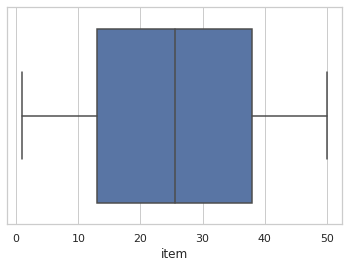

In [7]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=forcast['item'])

In [8]:
print(forcast[['item','sales']].corr())

           item     sales
item   1.000000 -0.055998
sales -0.055998  1.000000


In [9]:
forcast = forcast.drop(columns=['store'])

In [10]:
#forcast = forcast.drop(columns=['month','year'])

In [11]:
forcast.head()

,date,item,sales
0,2013-01-01,1,13
1,2013-01-02,1,11
2,2013-01-03,1,14
3,2013-01-04,1,13
4,2013-01-05,1,10


In [12]:
from datetime import datetime
month = []
#year = []
for d in forcast['date']:
    month.append(d.month)
    #year.append(d.year)

In [13]:
forcast['month'] = month
#forcast['year'] = year

In [14]:
forcast = forcast.drop(columns=['date'])

In [15]:
forcast.head()

,item,sales,month
0,1,13,1
1,1,11,1
2,1,14,1
3,1,13,1
4,1,10,1


In [16]:
forcasttmp = forcast.groupby(['item','month']).sum()
forcasttmp.columns

Index(['sales'], dtype='object')

In [17]:
forcasttmp1 = forcast.groupby(['item','month'])['sales'].sum().reset_index().sort_values('sales', ascending=False)
forcasttmp1

,item,month,sales
174,15,7,174769
330,28,7,174502
210,18,7,167898
150,13,7,166951
534,45,7,161164
...,...,...,...
0,1,1,22987
36,4,1,22891
59,5,12,21484
49,5,2,19507


In [18]:
forcasttmp1.get(0)

In [19]:
quater = []
for index, row in forcasttmp1.iterrows():
    if row['month'] in [1, 2, 3]:
        quater.append(1)
    elif row['month'] in [4, 5, 6]:
        quater.append(2)
    elif row['month'] in [7, 8, 9]:
        quater.append(3)
    else:
        quater.append(4)
forcasttmp1['quater'] = quater
forcasttmp1.head()

,item,month,sales,quater
174,15,7,174769,3
330,28,7,174502,3
210,18,7,167898,3
150,13,7,166951,3
534,45,7,161164,3


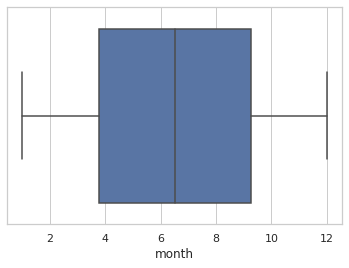

In [20]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=forcasttmp1['month'])

In [21]:
print(forcasttmp1[['month','sales']].corr())

          month     sales
month  1.000000  0.120542
sales  0.120542  1.000000


* Aggarate data at item level
* three month level

In [22]:
print(forcasttmp1[['item','sales']].corr())

           item     sales
item   1.000000 -0.067704
sales -0.067704  1.000000


* There is no null data
* As per box plot, there is no outliers
* Except date, all are numeric data, so no need of encoding
* From date, we can extract month and year of sale, which will be useful for monthly and yearly calculation.

#Feature distribution & EDA & Ecoding

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

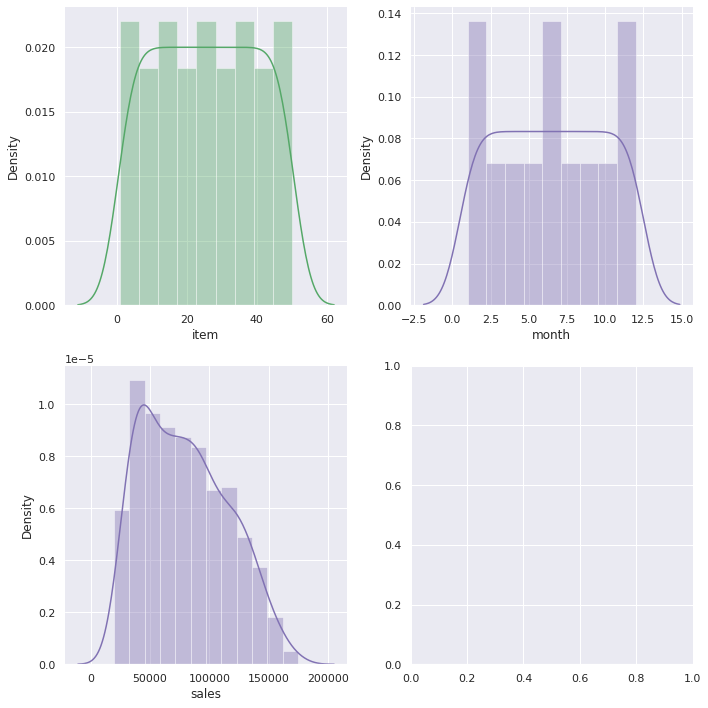

In [23]:
sns.set(color_codes=True)
#sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.despine(left=True)

#item
sns.distplot(forcasttmp1.item, kde=True, color="g", ax=axes[0, 0])

#sales
sns.distplot(forcasttmp1.sales, kde=True, color="m", ax=axes[1, 0])

#month
sns.distplot(forcasttmp1.month, kde=True, color="m", ax=axes[0, 1])

plt.tight_layout()
plt.show()

* There is positive skew in sales.
* Other details are uniformly distributed.

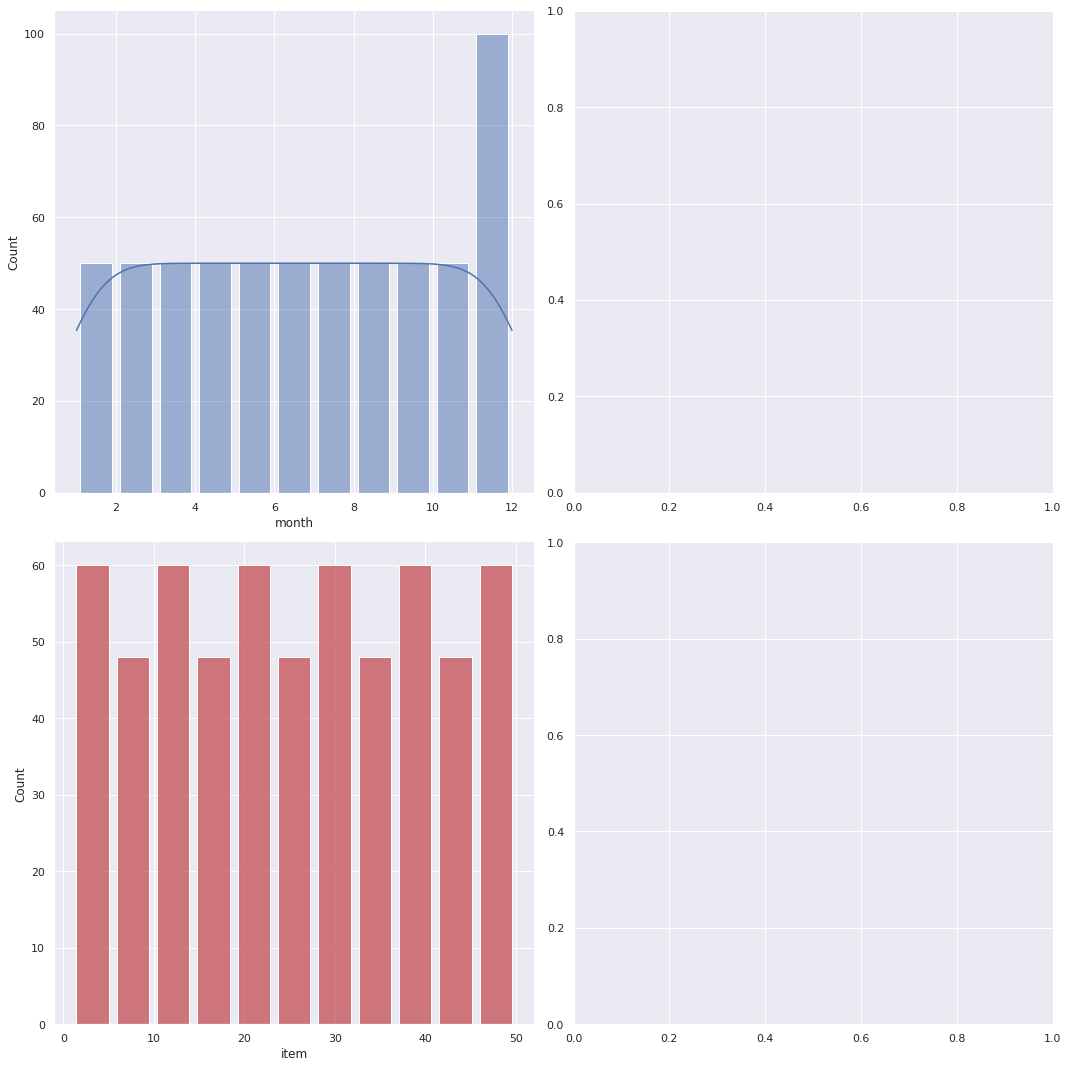

In [24]:
sns.set(color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.despine(left=True)

#month
sns.histplot(forcasttmp1, x = 'month', kde=True, shrink=0.8, ax = axes[0,0])

#item
sns.histplot(forcasttmp1.item, shrink=0.8, color="r", ax = axes[1, 0])

plt.tight_layout()
plt.show()

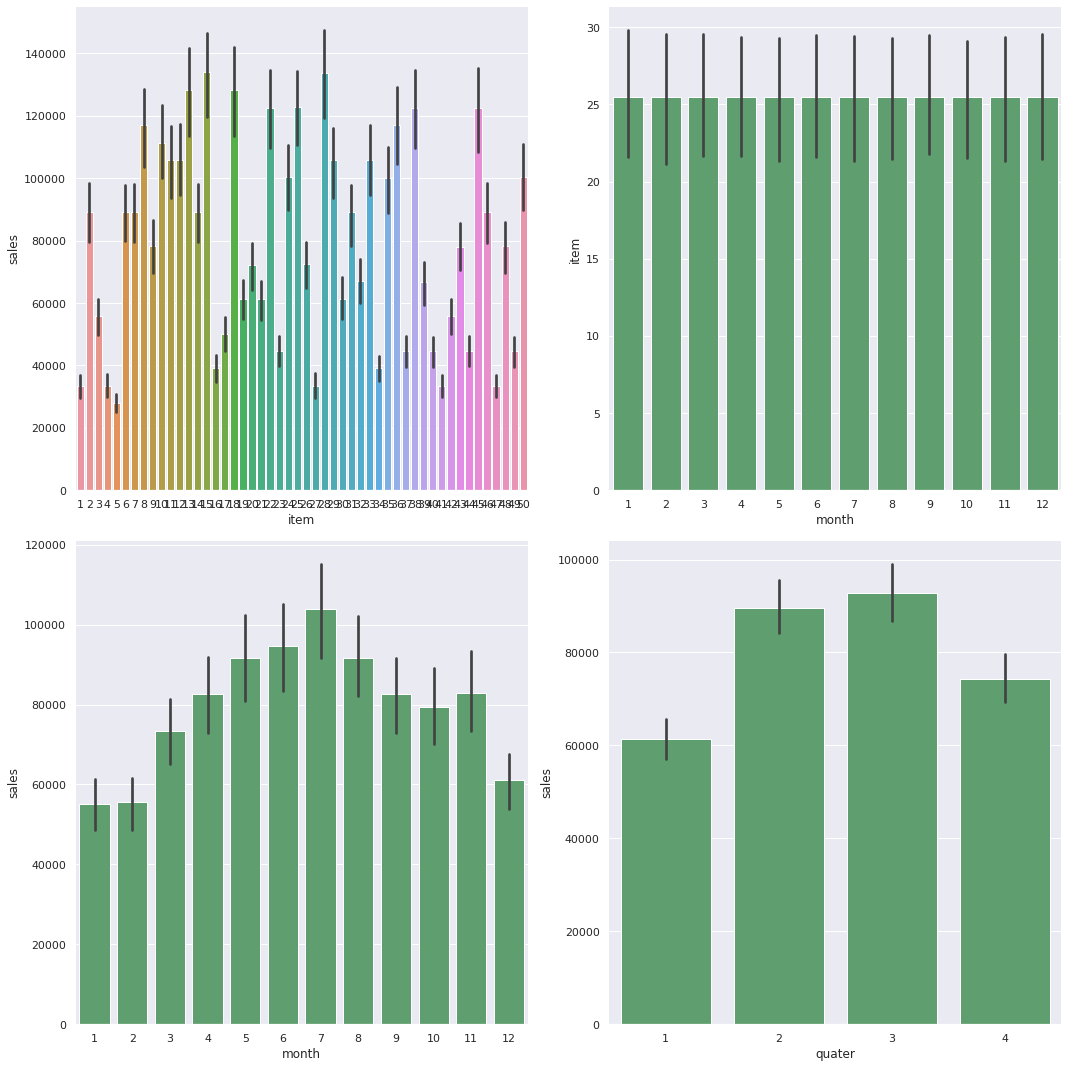

In [25]:
sns.set(color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.despine(left=True)

#item
sns.barplot(y="sales", x="item", data=forcasttmp1, ax=axes[0, 0])

#month
sns.barplot(y="item", x="month", data=forcasttmp1, color="g", ax=axes[0, 1])

#month
sns.barplot(y="sales", x="month", data=forcasttmp1, color="g", ax=axes[1, 0])

#quater
sns.barplot(y="sales", x="quater", data=forcasttmp1, color="g", ax=axes[1, 1])

plt.tight_layout()
plt.show()

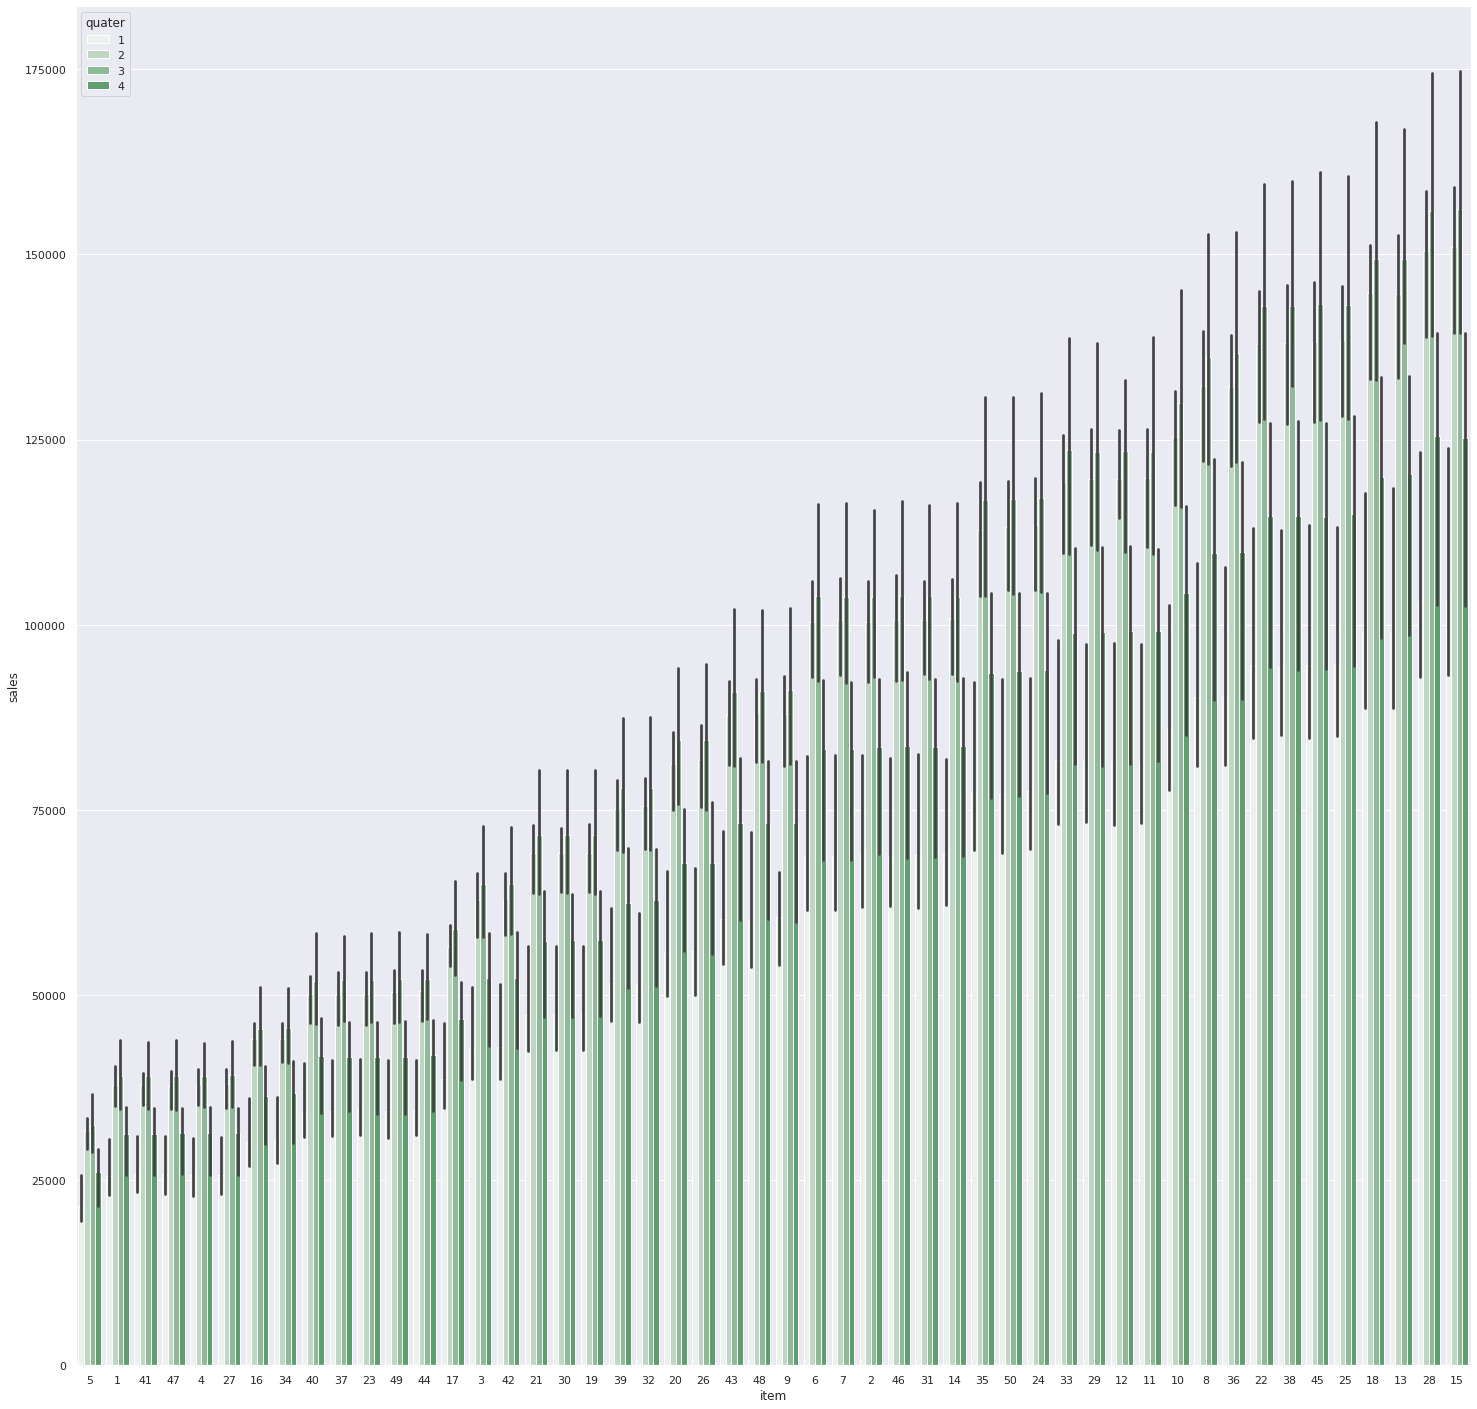

In [26]:
sns.set(color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(figsize=(25, 25))

#quater
sns.barplot(y="sales", x="item", data=forcasttmp1, color="g", hue='quater', ax=axes, order=forcasttmp1.groupby('item')['sales'].mean().reset_index().sort_values('sales')['item'])


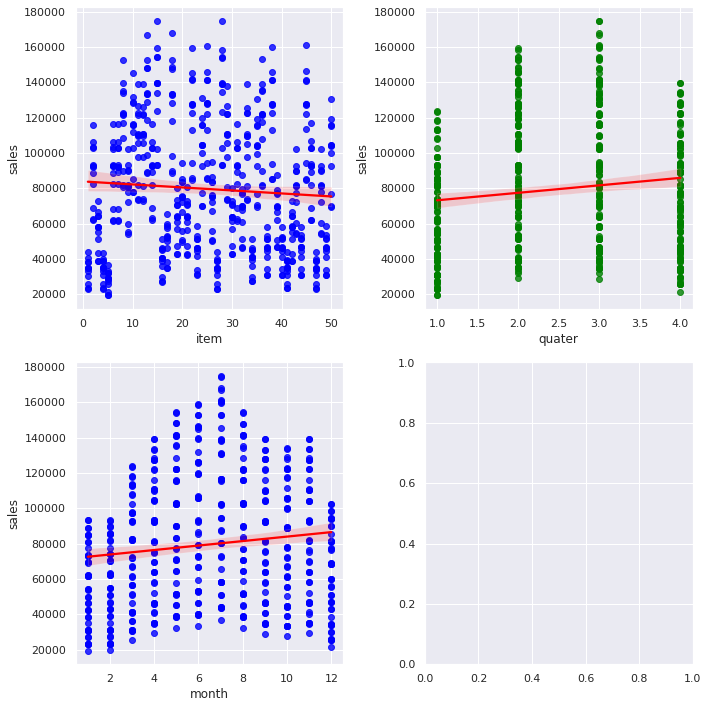

In [27]:
sns.set(color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.regplot(x=forcasttmp1['item'], y=forcasttmp1['sales'], scatter_kws={"color" : "blue"}, line_kws={"color" : "red"}, ax=axes[0,0])

sns.regplot(x=forcasttmp1['quater'], y=forcasttmp1['sales'], scatter_kws={"color" : "green"}, line_kws={"color" : "red"}, ax=axes[0,1])

sns.regplot(x=forcasttmp1['month'], y=forcasttmp1['sales'], scatter_kws={"color" : "blue"}, line_kws={"color" : "red"}, ax=axes[1,0])

#sns.regplot(x=forcast['year'], y=forcast['sales'], scatter_kws={"color" : "blue"}, line_kws={"color" : "red"}, ax=axes[1,1])

plt.tight_layout()
plt.show()

* There is slightly linear relation between sales and month
* year and sales - linear relation

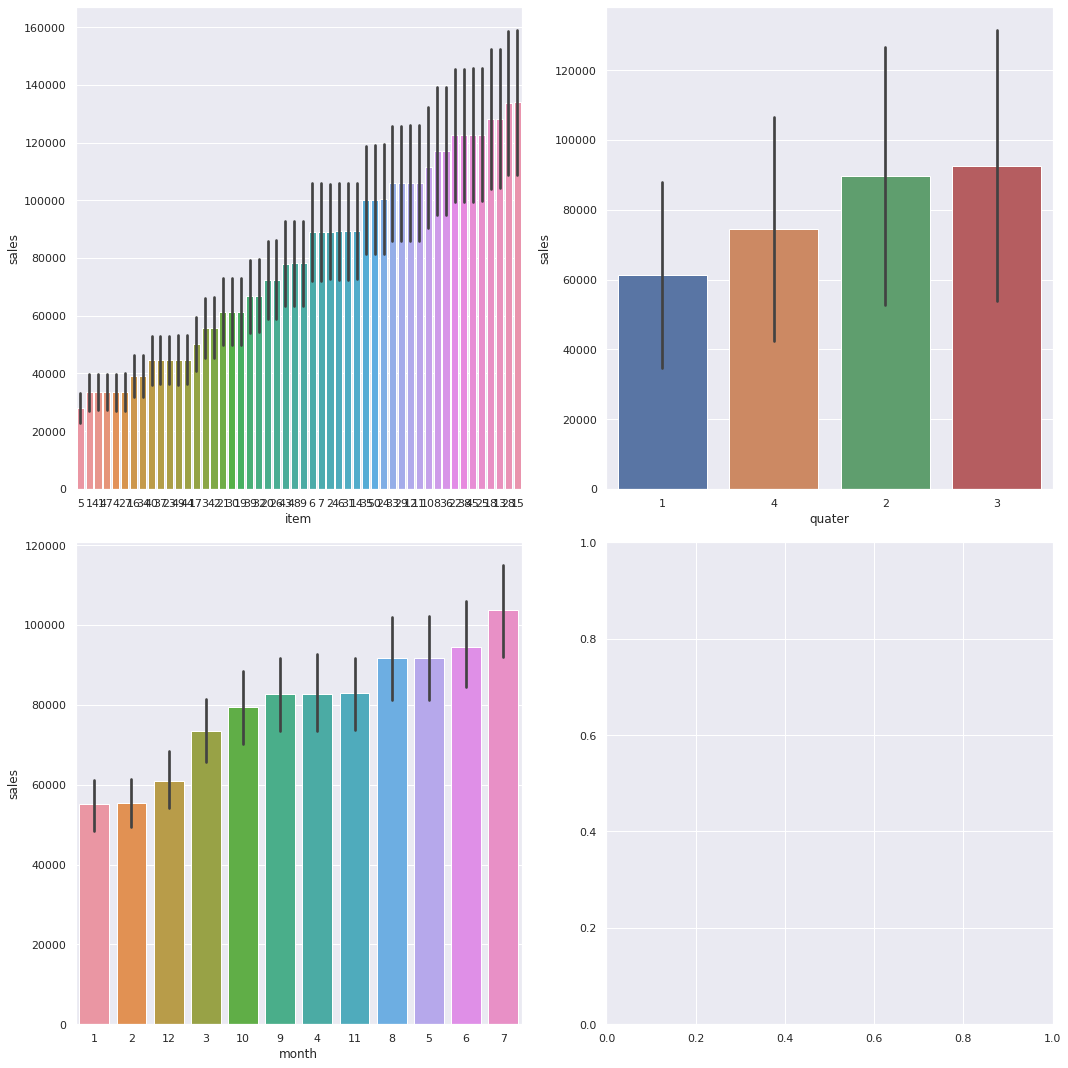

In [28]:
sns.set(color_codes=True, style="darkgrid")
f, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.barplot(x=forcasttmp1.item,y=forcasttmp1.sales,order=forcasttmp1.groupby('item')['sales'].mean().reset_index().sort_values('sales')['item'], ax=axes[0,0], ci="sd")

sns.barplot(x=forcasttmp1.quater,y=forcasttmp1.sales,order=forcasttmp1.groupby('quater')['sales'].mean().reset_index().sort_values('sales')['quater'], ax=axes[0,1], ci="sd")

sns.barplot(x=forcasttmp1.month,y=forcasttmp1.sales,order=forcasttmp1.groupby('month')['sales'].mean().reset_index().sort_values('sales')['month'], ax=axes[1,0])

#sns.barplot(x=forcast.year,y=forcast.sales,order=forcast.groupby('year')['sales'].mean().reset_index().sort_values('sales')['year'], ax=axes[1,1])

plt.tight_layout()
plt.show()

* There is almost linear relation between the features and target
* Highest sale 
    *  Month - July
    * Quater - 3rd (4,5,6)
* lowest sale
    * Month - Jan
    * Quater - 1st

# Machine Learning Model

**Predict the demand for the next 3 months at the item level (i.e. all the stores combined).**

Preparing data

* Will drop the date column, since the sales is calculated for month wise and year wise

In [ ]:
forcast = forcast.drop(columns='date')

In [58]:
forcasttmp1.head()

,item,month,sales,quater
174,15,7,174769,3
330,28,7,174502,3
210,18,7,167898,3
150,13,7,166951,3
534,45,7,161164,3


In [32]:
forcasttmp1.loc[:,forcasttmp1.columns != 'sales'].columns

Index(['item', 'month', 'quater'], dtype='object')

In [39]:
x = forcasttmp1.loc[:,forcasttmp1.columns != 'sales'].values # features
y = forcasttmp1.loc[:,forcasttmp1.columns == 'sales'].values # target

from sklearn.model_selection import train_test_split #import the required function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

Scaling - if required

In [40]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(x_train) # find the values of mean(mu) and SD(sigma)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test) 

Linear Modeling

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [42]:
print(regressor.intercept_) # c

coeff_values = pd.DataFrame(regressor.coef_.transpose(), ['item', 'month', 'quater'], columns=['Coefficient'])
print(coeff_values) # m values

[69982.38399737]
         Coefficient
item     -121.810350
month   -2514.491948
quater  11589.786852


In [43]:
import numpy as np

y_pred = regressor.predict(x_test) # IP = features of the test dataset, OP = final predictions
forcastRes = pd.DataFrame(np.column_stack([y_test, np.around(y_pred, 2), np.around((y_test-y_pred), 2)]), columns=['Actual', 'Predicted', 'Difference'])
#hDataRes = pd.DataFrame(list(zip(y_test, y_pred, (y_test-y_pred))), columns=['Actual', 'Predicted', 'Difference'])
forcastRes

,Actual,Predicted,Difference
0,46866.0,83809.71,-36943.71
1,55959.0,83731.42,-27772.42
2,38974.0,71427.15,-32453.15
3,46398.0,75159.75,-28761.75
4,93187.0,75646.99,17540.01
...,...,...,...
115,160545.0,84105.04,76439.96
116,90121.0,74742.60,15378.40
117,104229.0,82591.60,21637.40
118,139421.0,81276.83,58144.17


In [44]:
#Metrics

from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.014661746524108787


R2 score is very low, so very worst model

In [45]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=2, step=3)
selector = selector.fit(x_train_scaled, y_train)
list(zip([ 'item', 'month','quater'],selector.support_))

[('item', False), ('month', True), ('quater', True)]

* Top features:
    *  item and month

In [46]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(x_train_scaled, y_train)
print(list(zip([ 'item', 'month','quater'],sfs.get_support())))

[('item', False), ('month', True), ('quater', True)]


In [47]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model
cv_results = cross_validate(regressor, x, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

-90.73789614076505

**KNN Modelling**

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score

def knn_no_plot(data, k, p):
    x = data[[ 'item', 'month','quater']].values 
    y = data['sales'].values # y -> target value
    reg = KNeighborsRegressor(n_neighbors=k, p=p) #initialise the model with neighbours as k - hyper parameter p=1 - manhattan p=2 - Euclioden
    reg.fit(x, y) # train the model
    print("K : ", k, 
          " Train Accuracy : ", reg.score(x,y), 
          " Val Accuracy : ", np.mean(cross_val_score(reg, x, y, cv=3)))  # test model and computes the accuracy (train data accuracy)
          # default 5-fold cross validation - cv


In [49]:
for i in [1,5,10,15,20,25,30,35,40,45,50]:
  knn_no_plot(forcasttmp1, i, 1) # Manhattan Distance

K :  1  Train Accuracy :  1.0  Val Accuracy :  -19.046018515452975
K :  5  Train Accuracy :  0.6341104743961341  Val Accuracy :  -15.77622242998684
K :  10  Train Accuracy :  0.4819339804887828  Val Accuracy :  -15.66768815711466
K :  15  Train Accuracy :  0.41144819101838237  Val Accuracy :  -15.729165169634792
K :  20  Train Accuracy :  0.4017178576130994  Val Accuracy :  -15.742799923945746
K :  25  Train Accuracy :  0.390424142394587  Val Accuracy :  -15.915990134797113
K :  30  Train Accuracy :  0.3774240898283532  Val Accuracy :  -16.04336607777415
K :  35  Train Accuracy :  0.353105813179753  Val Accuracy :  -16.179019120046846
K :  40  Train Accuracy :  0.3315909990941288  Val Accuracy :  -16.242115136102253
K :  45  Train Accuracy :  0.31280321148340173  Val Accuracy :  -16.42392344739203
K :  50  Train Accuracy :  0.2926704940404429  Val Accuracy :  -16.588417928003263


In [50]:
for i in [1,5,10,15,20,25,30,35,40,45,50]:
  knn_no_plot(forcasttmp1, i, 2) # Euclidean Distance

K :  1  Train Accuracy :  1.0  Val Accuracy :  -18.705330156653375
K :  5  Train Accuracy :  0.6209250656267373  Val Accuracy :  -16.513616523635676
K :  10  Train Accuracy :  0.3859712079710552  Val Accuracy :  -15.82725253771327
K :  15  Train Accuracy :  0.36632651775308267  Val Accuracy :  -16.158921479976133
K :  20  Train Accuracy :  0.31958696156923405  Val Accuracy :  -16.34181481350289
K :  25  Train Accuracy :  0.2852025968262477  Val Accuracy :  -16.452561107507023
K :  30  Train Accuracy :  0.33173650039703106  Val Accuracy :  -16.62924066656709
K :  35  Train Accuracy :  0.30644145410749024  Val Accuracy :  -16.64476465006888
K :  40  Train Accuracy :  0.2890653545501677  Val Accuracy :  -16.826636662577304
K :  45  Train Accuracy :  0.26786888138783904  Val Accuracy :  -16.94588700298665
K :  50  Train Accuracy :  0.27092457242004897  Val Accuracy :  -17.00483913425569


In [51]:
reg = KNeighborsRegressor(n_neighbors=20, p=2) # Euclidean distance
reg.fit(x, y)
y_pred_e = reg.predict(x_test)
reg = KNeighborsRegressor(n_neighbors=20, p=1) # manhattan distance
reg.fit(x, y)
y_pred_m = reg.predict(x_test)

In [53]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred_e)

0.42135183012968247

In [54]:
r2_score(y_test, y_pred_m)

0.4950781706656373

**Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train) # ask all possible questions, compute the information gain and choose the best split

y_pred_dt = dt.predict(x_test)
#y_pred_dt

Evaluation

In [56]:
r2_score(y_test, y_pred_dt)

0.8579652185347373

Important Features

In [60]:
importance = dt.feature_importances_
list(zip(importance,forcasttmp1.columns))

[(0.8219072900753426, 'item'),
 (0.1689599733124341, 'month'),
 (0.009132736612223325, 'sales')]

In [ ]:
#To plot tree
#from sklearn import tree
#tree.plot_tree(dt)

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  
  dt = DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
  dt.fit(x_train, y_train)
  trainAccuracy = r2_score(y_train, dt.predict(x_train))
  dt = DecisionTreeRegressor(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10, scoring = make_scorer(r2_score)) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print(depth, trainAccuracy, np.mean(valAccuracy))

1 0.08967928413097748 0.059787768842202674
2 0.1909024551334395 0.15536112156219684
3 0.296059483255234 0.26716634814447143
4 0.35860430603171367 0.3086887143616363
5 0.42816031649308073 0.34751775104071975
6 0.4660486401992092 0.3570207865620906
7 0.5072631663342286 0.4076175103813243
8 0.5655715890373287 0.451337186205202
9 0.6438269197073911 0.5297329922662296
10 0.7207055812140787 0.5603559707222401
20 0.9976053226224735 0.8097952701095622
40 1.0 0.814201802783708
60 1.0 0.8187441189471076


Voting Regressor

In [69]:
from sklearn.ensemble import VotingRegressor # this is the function that ensembles my model
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

model1 = LinearRegression()
model2 = tree.DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(3)
model = VotingRegressor(estimators=[('lr', model1), ('dt', model2),('knn',model3)]) # it will stitich all the models together, voting = hard means max voting 
# we need to give the list of models that we are trying to combine
model.fit(x_train,y_train) # to train all of the models
y_pred = model.predict(x_test)
model.score(x_test,y_test) # prediction


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6838492925869445

**Bootstrap aggregation**

In [70]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
# weakLearner = tree.DecisionTreeClassifier(max_depth = 1)
# weakLearner.fit(x_train, y_train)
# weakLearner.score(x_test,y_test)
br_model = BaggingRegressor(tree.DecisionTreeRegressor(max_depth = 1, random_state=1), n_estimators=100)
br_model.fit(x_train, y_train)
y_pred_br = br_model.predict(x_test)
br_model.score(x_test,y_test) # input test data output R2 of self.predict(X) wrt. y.

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.12918021805455138

**Random Forest**

In [71]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(x_train, y_train);
y_pred_rf = rf.predict(x_test)

# Calculate the absolute errors
#errors = abs(y_pred_rf - y_test)

# Print out the mean absolute error (mae)
#print('MAE :', round(np.mean(errors), 2), 'degrees.')

# Compare to baseline
# improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
# print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

r2_score(y_test, y_pred_rf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.27887578623623765

Visualize tree

In [66]:
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[2]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = forcasttmp1.loc[:,forcasttmp1.columns != 'sales'].columns, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

Small Tree

In [67]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(x_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = forcasttmp1.loc[:,forcasttmp1.columns != 'sales'].columns, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


feature importances

In [72]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(forcasttmp1.loc[:,forcasttmp1.columns != 'sales'].columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: item                 Importance: 0.44
Variable: month                Importance: 0.36
Variable: quater               Importance: 0.2


**XG Boost**

In [73]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3928424576234557  Cross-Val score :  -0.45587608149976766
Learning rate :  0.02  Train score :  0.32812147774192923  Cross-Val score :  0.26497278769175914
Learning rate :  0.03  Train score :  0.5015443095687049  Cross-Val score :  0.43594639482772646
Learning rate :  0.04  Train score :  0.5793624456722153  Cross-Val score :  0.5108103338004713
Learning rate :  0.05  Train score :  0.643801227732333  Cross-Val score :  0.5697199193688985
Learning rate :  0.06  Train score :  0.6866219944352783  Cross-Val score :  0.6164648922232463
Learning rate :  0.07  Train score :  0.7307099186188277  Cross-Val score :  0.6679860091606032
Learning rate :  0.08  Train score :  0.7683201493706174  Cross-Val score :  0.7076077637706737
Learning rate :  0.09  Train score :  0.8120066931590009  Cross-Val score :  0.7409668691679802
Learning rate :  0.1  Train score :  0.8380942014832201  Cross-Val score :  0.7799196635556481
Learning rate :  0.11  Train score :

In [74]:
model = xgb.XGBRegressor(learning_rate = 0.5, n_estimators=100) #upto 0.5 Cross-Val score is increasing
model.fit(x_train,y_train) #train the model
model.score(x_test, y_test) # scoring the model - r2 squared

[11:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9792950613421485